Downloader

In [1]:
!pip install google_images_download

     |████████████████████████████████| 911kB 13.7MB/s 
  Created wheel for google-images-download: filename=google_images_download-2.8.0-py2.py3-none-any.whl size=14550 sha256=35b7ff6210fa330c79dbb8e00217201a6a18a2049f577bf57faf08ec7a3c5728
  Stored in directory: /root/.cache/pip/wheels/1f/28/ad/f56e7061e1d2a9a1affe2f9c649c2570cb9198dd24ede0bbab
Successfully built google-images-download


In [0]:
from google_images_download import google_images_download

response = google_images_download.googleimagesdownload()

In [0]:
arguments = {
    "keywords":"Polar bears,baloons,Beaches",
    "limit":20,
    "print_urls":False,
    "no_download": True,
    "silent_mode": True
    }   #creating list of arguments
paths = response.download(arguments)   #passing the arguments to the function
print(paths)   #printing absolute paths of the downloaded images

({'Polar bears': ['https://upload.wikimedia.org/wikipedia/commons/6/66/Polar_Bear_-_Alaska_%28cropped%29.jpg', 'https://19mvmv3yn2qc2bdb912o1t2n-wpengine.netdna-ssl.com/science/files/2013/12/tnc_17745326_preview-1260x708.jpg', 'https://i.ytimg.com/vi/lQ0ls70E7Hg/maxresdefault.jpg', 'https://polarbearscience.files.wordpress.com/2019/06/standing-bear_shutterstock_751891378_cropped-web-sized-1-e1559600104420.jpg?w=500', 'http://polarbearsinternational.org/media/3315/00473-54115.jpg?width=480', 'https://www.nwf.org/-/media/NEW-WEBSITE/Shared-Folder/Wildlife/Mammals/mammal_polar_bear_cubs_fighting_alaska_michael_henry_600x300.ashx', 'https://newsdeeply.imgix.net/20170717065230/POLAR-BEAR-EATING-A-BEARDED-SEAL-SPITSBERGEN.jpg?w=640&fit=max&q=60', 'https://explorersweb.com/wp-content/uploads/2019/07/bear1.jpg', 'https://www.wwf.org.uk/sites/default/files/styles/social_share_image/public/2016-12/Original_WW22791.jpg?itok=Ouo7tsEJ', 'https://c402277.ssl.cf1.rackcdn.com/photos/2330/images/hero_s

In [0]:
import requests

#https://stackoverflow.com/questions/16694907/download-large-file-in-python-with-requests#16696317
def download_file(url, file):
    local_filename = file
    # NOTE the stream=True parameter below
    with requests.get(url, stream=True) as r:
        r.raise_for_status()
        with open(local_filename, 'wb') as f:
            for chunk in r.iter_content(chunk_size=8192): 
                if chunk: # filter out keep-alive new chunks
                    f.write(chunk)
                    # f.flush()
    return local_filename


#http://www.stealthcopter.com/blog/2009/09/python-making-multi-depth-directories/
import os
def mkdirnotex(filename):
	folder=os.path.dirname(filename)
	if not os.path.exists(folder):
		os.makedirs(folder)

In [0]:
from pathlib import Path
from urllib.request import urlretrieve
from PIL import Image
class GoogleImageOnFlyDownloader():
    def _download_urls(self, arguments):
        response = google_images_download.googleimagesdownload()
        urls = response.download(arguments)[0]
        for k,v in urls.items():
            if len(v) > 0:
                continue
            arguments["keywords"] = k
            urls[k] = self._download_urls(arguments)[k]
        return urls

    def __init__(self, keywords: [str, list], limit=100, folder=Path("giof"), download=True):
        if type(keywords) == list: keywords = ','.join(keywords)

        arguments = {
            "keywords": keywords,
            "limit":limit,
            "print_urls":False,
            "no_download": True,
            "silent_mode": True
            }
        
        self.urls = self._download_urls(arguments)
        self.download = download
        self.folder = folder
    
    def _download_image(self,url,dest):
        mkdirnotex(dest)
        if os.path.isfile(dest): return
        download_file(url, dest)

    def __getitem__(self, key):
        assert len(key) == 2

        key, index = key 

        url = self.urls.get(key)[index]
        ext = url.split('.')[-1]
        dest = self.folder/key/f"{index}"
        self._download_image(url, dest)

        return Image.open(dest)

In [0]:
giof= GoogleImageOnFlyDownloader("Polar bears,baloons,Beaches")



Unfortunately all 100 could not be downloaded because some images were not downloadable. 0 is all we got for this search filter!


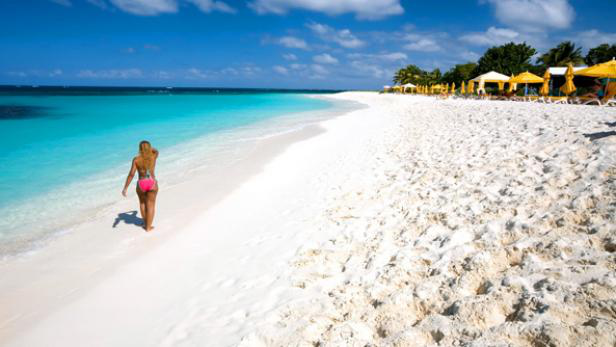

In [0]:
giof["Beaches",10]